In [ ]:
# prompt: connect ke google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# =======================
# 1. Ambil 40 data film
# =======================
movies_40 = movies.sample(n=40, random_state=42)
movies_40.to_csv(base_path + "movies_sample_40.csv", index=False)

print("✔ movies_sample_40.csv dibuat (40 data film)")


# =======================
# 2. Gabungkan ratings + movies + users
# =======================
merged = ratings.merge(movies, on="movie_id", how="left") \
                .merge(users, on="user_id", how="left")

merged_40 = merged.sample(n=40, random_state=42)
merged_40.to_csv(base_path + "merged_sample_40.csv", index=False)

print("✔ merged_sample_40.csv dibuat (40 data gabungan)")


# =======================
# 3. (PENTING untuk KUIS)
#   Ambil kolom yang memenuhi syarat Power BI
# =======================

kuis_cols = [
    "user_id", "age", "gender", "occupation",
    "movie_id", "title", "rating", "timestamp",
    "Comedy", "Drama", "Action"
]

kuis_dataset = merged_40[kuis_cols]
kuis_dataset.to_csv(base_path + "kuis_powerbi_dataset.csv", index=False)

print("✔ kuis_powerbi_dataset.csv siap untuk Power BI (kolom sesuai syarat kuis)")


✔ movies_sample_40.csv dibuat (40 data film)
✔ merged_sample_40.csv dibuat (40 data gabungan)
✔ kuis_powerbi_dataset.csv siap untuk Power BI (kolom sesuai syarat kuis)


In [ ]:
import pandas as pd

# Base path tempat file ml-100k berada
base_path = '/content/drive/MyDrive/Colab Notebooks/ml-100k/'

# =======================
# Convert u.data → ratings.csv
# =======================
ratings = pd.read_csv(
    base_path + 'u.data',
    sep='\t',
    names=['user_id', 'movie_id', 'rating', 'timestamp']
)
ratings.to_csv(base_path + 'ratings.csv', index=False)
print("Berhasil convert → ratings.csv")

# =======================
# Convert u.item → movies.csv
# =======================
genre_cols = [
    "Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

col_names = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + genre_cols

movies = pd.read_csv(
    base_path + 'u.item',
    sep='|',
    encoding='latin-1',
    names=col_names,
    usecols=col_names
)
movies.to_csv(base_path + 'movies.csv', index=False)
print("Berhasil convert → movies.csv")

# =======================
# Convert u.user → users.csv
# =======================
users = pd.read_csv(
    base_path + 'u.user',
    sep='|',
    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
    encoding='latin-1'
)
users.to_csv(base_path + 'users.csv', index=False)
print("Berhasil convert → users.csv")


Berhasil convert → ratings.csv
Berhasil convert → movies.csv
Berhasil convert → users.csv


In [5]:
import pandas as pd

# Base path lokasi file MovieLens
base_path = '/content/drive/MyDrive/Colab Notebooks/ml-100k/'

# =======================
# LOAD DATA ORIGINAL
# =======================
ratings = pd.read_csv(
    base_path + 'u.data',
    sep='\t',
    names=['user_id', 'movie_id', 'rating', 'timestamp']
)

genre_cols = [
    "Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

col_names = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + genre_cols

movies = pd.read_csv(
    base_path + 'u.item',
    sep='|',
    encoding='latin-1',
    names=col_names,
    usecols=col_names
)

users = pd.read_csv(
    base_path + 'u.user',
    sep='|',
    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
    encoding='latin-1'
)

# =======================
# SAMPLING DATA — 40 baris rating
# =======================
ratings_small = ratings.sample(40, random_state=42)

# Filter film & user yang muncul pada sample
movies_small = movies[movies["movie_id"].isin(ratings_small["movie_id"].unique())]
users_small = users[users["user_id"].isin(ratings_small["user_id"].unique())]

# =======================
# EXPORT CSV MINI
# =======================
ratings_small.to_csv(base_path + "ratings_small.csv", index=False)
movies_small.to_csv(base_path + "movies_small.csv", index=False)
users_small.to_csv(base_path + "users_small.csv", index=False)

print("=== SAMPLE DATASET 40 BARIS BERHASIL ===")
print("ratings_small.csv :", ratings_small.shape)
print("movies_small.csv  :", movies_small.shape)
print("users_small.csv   :", users_small.shape)


=== SAMPLE DATASET 40 BARIS BERHASIL ===
ratings_small.csv : (40, 4)
movies_small.csv  : (37, 24)
users_small.csv   : (36, 5)


=== LOADING DATA ===
Data berhasil dimuat!
Ratings shape: (100000, 4)
Movies shape: (1682, 24)
Users shape: (943, 5)

Ratings preview:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Movies preview:
   movie_id              title release_date
0         1   Toy Story (1995)  01-Jan-1995
1         2   GoldenEye (1995)  01-Jan-1995
2         3  Four Rooms (1995)  01-Jan-1995
3         4  Get Shorty (1995)  01-Jan-1995
4         5     Copycat (1995)  01-Jan-1995

Users preview:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

=== EXPLORATORY DATA ANALYSIS ===
Info ratings:
<class 'pandas.

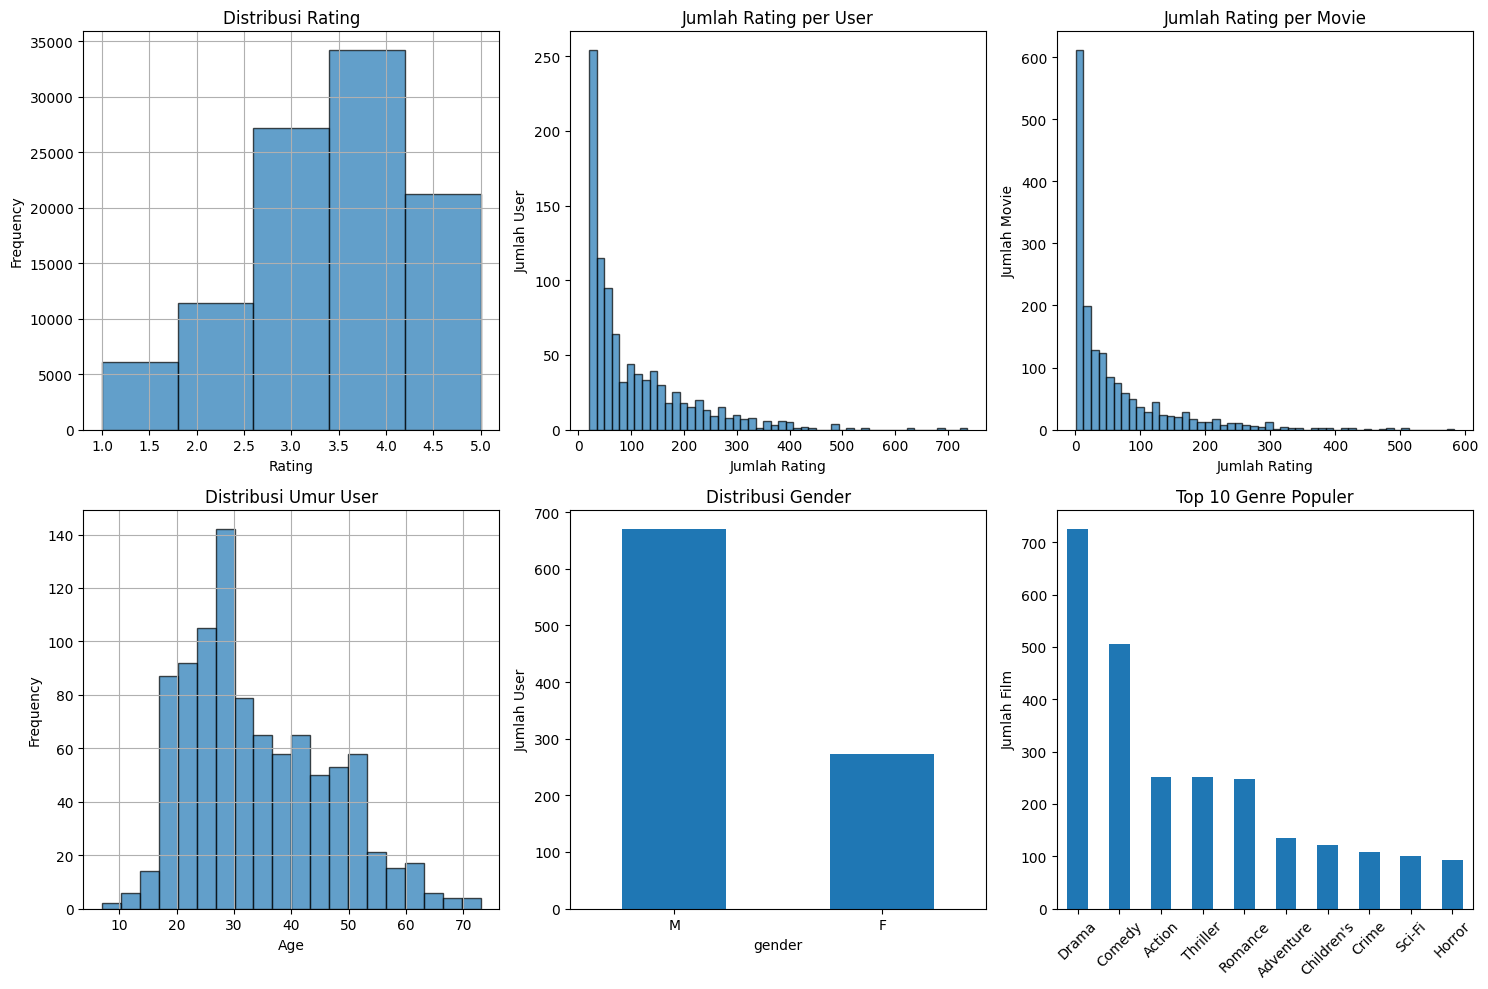

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, classification_report,
    silhouette_score
)
import warnings
warnings.filterwarnings('ignore')

# =====================================
# 1. LOAD DATA
# =====================================
print("=== LOADING DATA ===")

# Path file
base_path = '/content/drive/MyDrive/Colab Notebooks/ml-100k/'

# Load Users
users = pd.read_csv(base_path + 'u.user', sep='|',
                    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
                    encoding='latin-1')

# Genre Columns
genre_cols = ["Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
              "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
              "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

# Load Items
col_names = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + genre_cols
items = pd.read_csv(base_path + 'u.item', sep='|', encoding='latin-1',
                    names=col_names, usecols=col_names)

# Load Ratings
ratings = pd.read_csv(base_path + 'u.data', sep='\t',
                      names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Gabungkan Data
df = ratings.merge(users, on='user_id').merge(items, on='movie_id')

# =====================================
# 2. DATA PREVIEW
# =====================================
print("Data berhasil dimuat!")
print(f"Ratings shape: {ratings.shape}")
print(f"Movies shape: {items.shape}")
print(f"Users shape: {users.shape}\n")

print("Ratings preview:")
print(ratings.head())

print("\nMovies preview:")
print(items[['movie_id', 'title', 'release_date']].head())

print("\nUsers preview:")
print(users.head())

# =====================================
# 3. EXPLORATORY DATA ANALYSIS
# =====================================
print("\n=== EXPLORATORY DATA ANALYSIS ===")

print("Info ratings:")
print(ratings.info())
print(f"\nRating range: {ratings['rating'].min()} - {ratings['rating'].max()}")
print(f"Number of unique users: {ratings['user_id'].nunique()}")
print(f"Number of unique movies: {ratings['movie_id'].nunique()}")

print("\nUsers info:")
print(users.info())
print(f"Age range: {users['age'].min()} - {users['age'].max()}")
print(f"Gender distribution:\n{users['gender'].value_counts()}")

print("\nMovies info:")
print(f"Movies with release date: {items['release_date'].notna().sum()}/{len(items)}")
print("Genre columns check:", all(g in items.columns for g in genre_cols))

# Visualisasi
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
ratings['rating'].hist(bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
ratings_per_user = ratings.groupby('user_id').size()
plt.hist(ratings_per_user, bins=50, edgecolor='black', alpha=0.7)
plt.title('Jumlah Rating per User')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah User')

plt.subplot(2, 3, 3)
ratings_per_movie = ratings.groupby('movie_id').size()
plt.hist(ratings_per_movie, bins=50, edgecolor='black', alpha=0.7)
plt.title('Jumlah Rating per Movie')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Movie')

plt.subplot(2, 3, 4)
users['age'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribusi Umur User')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
users['gender'].value_counts().plot(kind='bar')
plt.title('Distribusi Gender')
plt.ylabel('Jumlah User')
plt.xticks(rotation=0)

plt.subplot(2, 3, 6)
genre_counts = items[genre_cols].sum().sort_values(ascending=False)
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Genre Populer')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# =====================================
# 4. DATA PREPROCESSING
# =====================================
print("\n=== DATA PREPROCESSING ===")

# Pastikan tipe data konsisten
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['movie_id'] = ratings['movie_id'].astype(int)
users['user_id'] = users['user_id'].astype(int)
items['movie_id'] = items['movie_id'].astype(int)

# Gabungkan kembali (jika df belum terbentuk)
df = ratings.merge(users, on='user_id').merge(items, on='movie_id')

# ------------------------------
# Feature Engineering
# ------------------------------
print("Feature engineering...")

# Statistik per user
user_stats = ratings.groupby('user_id').agg({
    'rating': ['mean', 'std', 'count'],
    'movie_id': 'nunique'
}).round(2)
user_stats.columns = ['user_avg_rating', 'user_rating_std', 'user_total_ratings', 'user_unique_movies']
user_stats = user_stats.reset_index()

# Statistik per movie
movie_stats = ratings.groupby('movie_id').agg({
    'rating': ['mean', 'std', 'count'],
    'user_id': 'nunique'
}).round(2)
movie_stats.columns = ['movie_avg_rating', 'movie_rating_std', 'movie_total_ratings', 'movie_unique_users']
movie_stats = movie_stats.reset_index()

# Gabungkan ke df utama
df = df.merge(user_stats, on='user_id')
df = df.merge(movie_stats, on='movie_id')

# Buat kelompok umur
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 50, 100],
                         labels=['<18', '18-25', '26-35', '36-50', '50+'])

# ------------------------------
# Handle missing values
# ------------------------------
df['user_rating_std'] = df['user_rating_std'].fillna(0)
df['movie_rating_std'] = df['movie_rating_std'].fillna(0)

# ------------------------------
# Encoding categorical features
# ------------------------------
le_gender = LabelEncoder()
le_occupation = LabelEncoder()
le_age_group = LabelEncoder()

df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['occupation_encoded'] = le_occupation.fit_transform(df['occupation'])
df['age_group_encoded'] = le_age_group.fit_transform(df['age_group'])

# ------------------------------
# Feature Scaling
# ------------------------------
scaler = StandardScaler()
numerical_cols = ['age', 'user_avg_rating', 'user_rating_std', 'user_total_ratings',
                  'user_unique_movies', 'movie_avg_rating', 'movie_rating_std',
                  'movie_total_ratings', 'movie_unique_users']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ------------------------------
# Final Output
# ------------------------------
print("✅ Data preprocessing completed!")
print(f"Final dataset shape: {df.shape}")
print(f"Available features: {df.columns.tolist()}")



=== DATA PREPROCESSING ===
Feature engineering...
✅ Data preprocessing completed!
Final dataset shape: (100000, 43)
Available features: ['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender', 'occupation', 'zip_code', 'title', 'release_date', 'video_release_date', 'imdb_url', 'Unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'user_avg_rating', 'user_rating_std', 'user_total_ratings', 'user_unique_movies', 'movie_avg_rating', 'movie_rating_std', 'movie_total_ratings', 'movie_unique_users', 'age_group', 'gender_encoded', 'occupation_encoded', 'age_group_encoded']



=== TUGAS REGRESI: Prediksi Rating Film ===
Checking if all features exist in dataframe...
✅ Regression features shape: (100000, 30)
✅ Features used: ['age', 'gender_encoded', 'occupation_encoded', 'user_avg_rating', 'user_rating_std', 'user_total_ratings', 'user_unique_movies', 'movie_avg_rating', 'movie_rating_std', 'movie_total_ratings', 'movie_unique_users', 'total_genres', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Training Linear Regression...

📊 Linear Regression Evaluation:
MAE : 0.7351
RMSE: 0.9284
R²  : 0.3175

Top 10 Most Important Features:
               Feature  Importance
7     movie_avg_rating    0.454045
3      user_avg_rating    0.392787
0                  age    0.045322
4      user_rating_std    0.017888
6   user_unique_movies    0.014975
5   user_total_ratings    0.014975
2   occupation_encoded    0.010069
19 

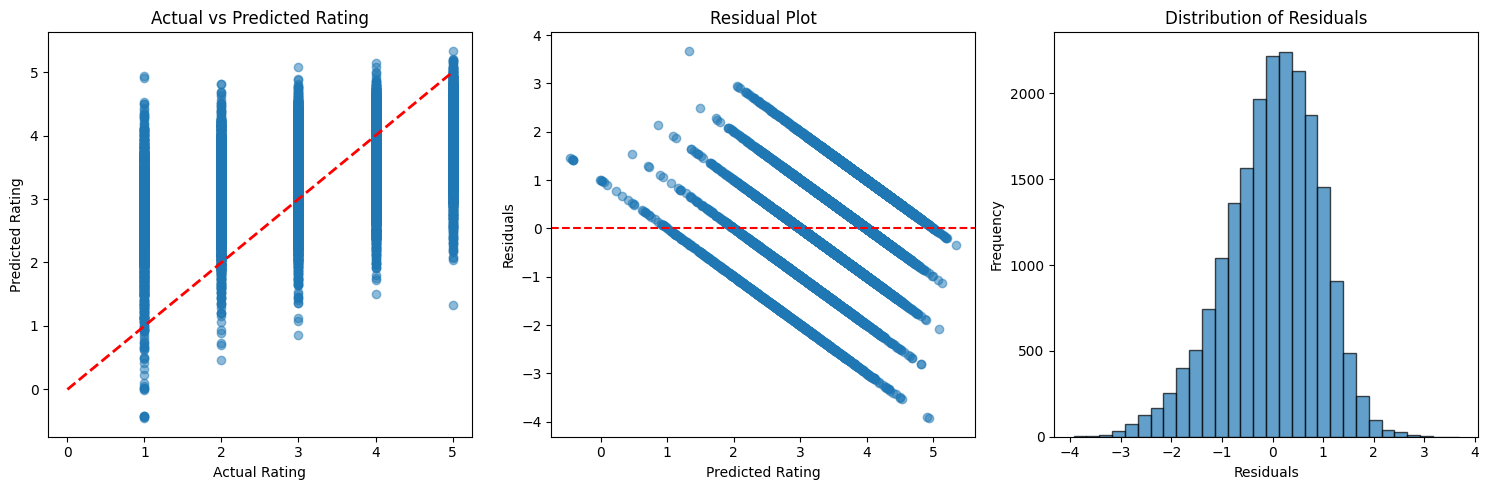

In [ ]:
# =====================================
# 4. TUGAS REGRESI - Prediksi Rating Film
# =====================================
print("\n=== TUGAS REGRESI: Prediksi Rating Film ===")

# Tambahkan total_genres jika belum ada
if 'total_genres' not in df.columns:
    genre_cols = ["Action", "Adventure", "Animation", "Children's", "Comedy",
                  "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
                  "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
    df['total_genres'] = df[genre_cols].sum(axis=1)

# Daftar fitur regresi
regression_features = [
    'age', 'gender_encoded', 'occupation_encoded',  # User profile
    'user_avg_rating', 'user_rating_std', 'user_total_ratings', 'user_unique_movies',  # User behavior
    'movie_avg_rating', 'movie_rating_std', 'movie_total_ratings', 'movie_unique_users',  # Movie stats
    'total_genres'  # Jumlah genre
] + genre_cols  # Genre indicators

# Pastikan semua fitur ada
print("Checking if all features exist in dataframe...")
missing_features = [f for f in regression_features if f not in df.columns]
if missing_features:
    print(f"⚠️ Missing features: {missing_features}")
    regression_features = [f for f in regression_features if f in df.columns]

# Siapkan data X dan y
X_reg = df[regression_features]
y_reg = df['rating']

print(f"✅ Regression features shape: {X_reg.shape}")
print(f"✅ Features used: {regression_features}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
print("Training Linear Regression...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Linear Regression Evaluation:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# Feature importance
importance_df = pd.DataFrame({
    'Feature': regression_features,
    'Importance': abs(model.coef_)
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Visualisasi
plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Rating')

# Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Histogram of residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()


In [ ]:
# =====================================
# 5. TUGAS KLASIFIKASI - Prediksi User Suka Film (>3.5)
# =====================================
print("\n=== TUGAS KLASIFIKASI: Prediksi User Suka Film (>3.5) ===")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# === STEP 1: Load and Merge Data ===
base_path = '/content/drive/MyDrive/Colab Notebooks/ml-100k/'

# Load datasets
users = pd.read_csv(base_path + 'u.user', sep='|',
                    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
                    encoding='latin-1')

ratings = pd.read_csv(base_path + 'u.data', sep='\t',
                      names=['user_id', 'movie_id', 'rating', 'timestamp'])

genre_cols = ["Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
              "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
              "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
item_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + genre_cols

items = pd.read_csv(base_path + 'u.item', sep='|', encoding='latin-1', names=item_cols, usecols=item_cols)

# Merge semua ke df
df = ratings.merge(users, on='user_id').merge(items, on='movie_id')

# Tambahkan fitur encoded
df['gender_encoded'] = LabelEncoder().fit_transform(df['gender'])
df['occupation_encoded'] = LabelEncoder().fit_transform(df['occupation'])

# Fitur tambahan
df['total_genres'] = df[genre_cols].sum(axis=1)

# Statistik user
user_stats = ratings.groupby('user_id').agg({
    'rating': ['mean', 'std', 'count'],
    'movie_id': 'nunique'
}).reset_index()
user_stats.columns = ['user_id', 'user_avg_rating', 'user_rating_std', 'user_total_ratings', 'user_unique_movies']
df = df.merge(user_stats, on='user_id')

# Statistik movie
movie_stats = ratings.groupby('movie_id').agg({
    'rating': ['mean', 'std', 'count'],
    'user_id': 'nunique'
}).reset_index()
movie_stats.columns = ['movie_id', 'movie_avg_rating', 'movie_rating_std', 'movie_total_ratings', 'movie_unique_users']
df = df.merge(movie_stats, on='movie_id')

# Handle missing std dev
df['user_rating_std'] = df['user_rating_std'].fillna(0)
df['movie_rating_std'] = df['movie_rating_std'].fillna(0)

# === STEP 2: Klasifikasi ===
# Buat label suka/tidak suka
df['Label'] = (df['rating'] > 3.5).astype(int)

# Ambil sampel agar lebih ringan
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

# Fitur klasifikasi
classification_features = [
    'age', 'gender_encoded', 'occupation_encoded',
    'user_avg_rating', 'user_rating_std', 'user_total_ratings', 'user_unique_movies',
    'movie_avg_rating', 'movie_rating_std', 'movie_total_ratings', 'movie_unique_users',
    'total_genres'
] + genre_cols

# Pastikan semua fitur tersedia
missing_cols = [col for col in classification_features if col not in df.columns]
if missing_cols:
    print(f"⚠️ Warning: Missing columns for classification: {missing_cols}")
    classification_features = [col for col in classification_features if col in df.columns]

X_cls = df[classification_features]
y_cls = df['Label']

# Split data
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Standarisasi
scaler_cls = StandardScaler()
X_cls_train_scaled = scaler_cls.fit_transform(X_cls_train)
X_cls_test_scaled = scaler_cls.transform(X_cls_test)

# Model Evaluation Helper
classification_results = {}

def train_and_evaluate(model, name):
    model.fit(X_cls_train_scaled, y_cls_train)
    y_pred = model.predict(X_cls_test_scaled)
    acc = accuracy_score(y_cls_test, y_pred)
    f1 = f1_score(y_cls_test, y_pred)
    classification_results[name] = {'accuracy': acc, 'f1': f1}
    print(f"{name} - Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")
    return y_pred

# SVM
print("\nTraining SVM...")
svm = SVC(kernel='rbf', random_state=42)
train_and_evaluate(svm, "SVM")

# Decision Tree
print("\nTraining Decision Tree...")
tree = DecisionTreeClassifier(random_state=42, max_depth=10)
train_and_evaluate(tree, "Decision Tree")

# KNN - cari k terbaik
print("\nTraining KNN...")
best_k = 3
best_acc = 0
for k in range(3, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_cls_train_scaled, y_cls_train)
    pred = knn.predict(X_cls_test_scaled)
    acc = accuracy_score(y_cls_test, pred)
    f1 = f1_score(y_cls_test, pred)
    classification_results[f'KNN (k={k})'] = {'accuracy': acc, 'f1': f1}
    if acc > best_acc:
        best_k = k
        best_acc = acc

# Simpan hasil KNN terbaik
classification_results['KNN'] = {
    'accuracy': classification_results[f'KNN (k={best_k})']['accuracy'],
    'f1': classification_results[f'KNN (k={best_k})']['f1'],
    'best_k': best_k
}

# Summary
print("\n=== CLASSIFICATION RESULTS SUMMARY ===")
for model, metrics in classification_results.items():
    print(f"{model}:")
    print(f"  Accuracy : {metrics['accuracy']:.4f}")
    print(f"  F1-Score : {metrics['f1']:.4f}")
    if 'best_k' in metrics:
        print(f"  Best k   : {metrics['best_k']}")



=== TUGAS KLASIFIKASI: Prediksi User Suka Film (>3.5) ===

Training SVM...
SVM - Accuracy: 0.6870, F1-Score: 0.7285

Training Decision Tree...
Decision Tree - Accuracy: 0.6600, F1-Score: 0.7012

Training KNN...

=== CLASSIFICATION RESULTS SUMMARY ===
SVM:
  Accuracy : 0.6870
  F1-Score : 0.7285
Decision Tree:
  Accuracy : 0.6600
  F1-Score : 0.7012
KNN (k=3):
  Accuracy : 0.5930
  F1-Score : 0.6427
KNN (k=4):
  Accuracy : 0.5960
  F1-Score : 0.5952
KNN (k=5):
  Accuracy : 0.6070
  F1-Score : 0.6562
KNN (k=6):
  Accuracy : 0.6120
  F1-Score : 0.6305
KNN (k=7):
  Accuracy : 0.6110
  F1-Score : 0.6603
KNN (k=8):
  Accuracy : 0.6150
  F1-Score : 0.6399
KNN (k=9):
  Accuracy : 0.6280
  F1-Score : 0.6788
KNN (k=10):
  Accuracy : 0.6230
  F1-Score : 0.6512
KNN (k=11):
  Accuracy : 0.6420
  F1-Score : 0.6919
KNN (k=12):
  Accuracy : 0.6400
  F1-Score : 0.6709
KNN (k=13):
  Accuracy : 0.6480
  F1-Score : 0.6918
KNN (k=14):
  Accuracy : 0.6350
  F1-Score : 0.6667
KNN (k=15):
  Accuracy : 0.6350


=== TUGAS CLUSTERING: Kelompokkan User berdasarkan Pola Rating ===
Menghitung rata-rata rating per genre untuk tiap user...
User clustering features shape: (831, 26)
Mencari jumlah cluster optimal dengan Elbow & Silhouette...


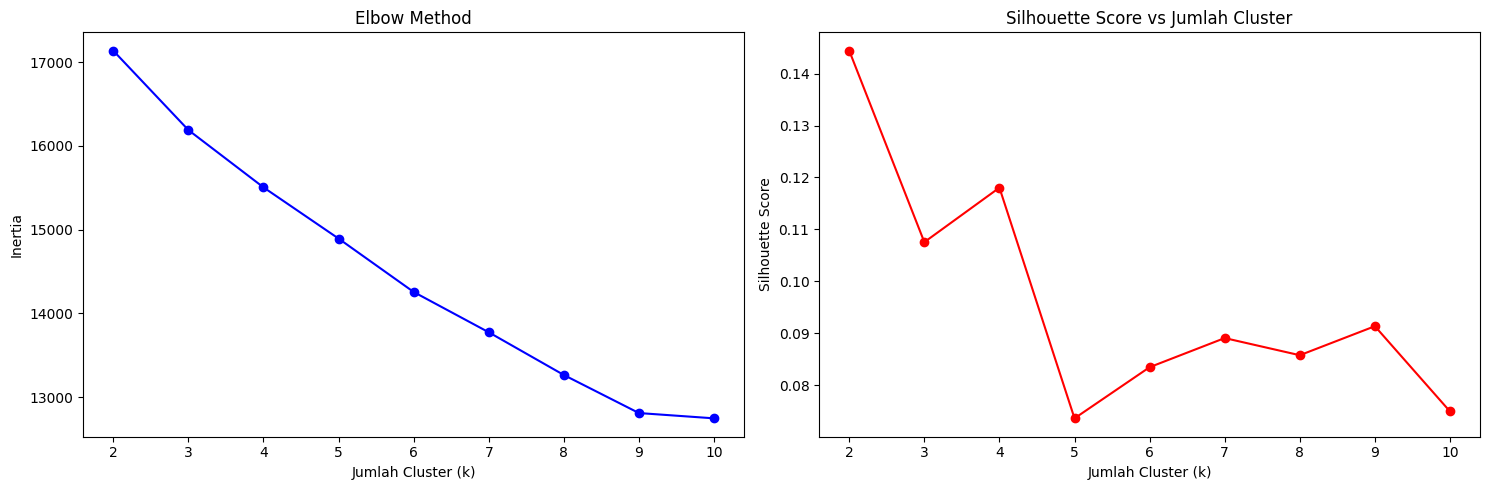

Optimal jumlah cluster berdasarkan silhouette score: 2

Hasil Clustering KMeans:
Silhouette Score (k=2): 0.1444

Ringkasan Cluster:
        rating_mean        rating_count        age_first         Action  \
               mean    std         mean    std      mean     std   mean   
cluster                                                                   
0             3.522  0.848        2.729  2.012    35.301  12.711  1.358   
1             3.677  0.510       10.194  6.423    31.970  10.977  3.459   

        Comedy  Drama Romance  
          mean   mean    mean  
cluster                        
0        1.602  2.577    1.40  
1        3.047  3.670    3.14  

Distribusi Jumlah User per Cluster:
cluster
0    465
1    366
Name: count, dtype: int64


In [ ]:
# =====================================
# 6. TUGAS CLUSTERING - Kelompokkan User berdasarkan Pola Rating
# =====================================
print("\n=== TUGAS CLUSTERING: Kelompokkan User berdasarkan Pola Rating ===")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Periksa keberadaan kolom genre
missing_genres = [g for g in genre_cols if g not in df.columns]
if missing_genres:
    raise ValueError(f"Genre columns missing in df: {missing_genres}")

# Hitung profil user berdasarkan rata-rata rating genre
def weighted_genre_mean(group):
    ratings = group['rating'].values
    genres = group[genre_cols].values
    weighted_sum = (genres.T * ratings).T.sum(axis=0)
    genre_sum = group[genre_cols].sum().values
    return pd.Series(weighted_sum / (genre_sum + 1e-8), index=genre_cols)

print("Menghitung rata-rata rating per genre untuk tiap user...")
user_genre_ratings = df.groupby('user_id').apply(weighted_genre_mean).fillna(0)

# Tambahkan statistik user
user_clustering_features = df.groupby('user_id').agg({
    'rating': ['mean', 'std', 'count'],
    'age': 'first',
    'gender_encoded': 'first',
    'occupation_encoded': 'first'
}).round(3)

# Rapikan nama kolom
user_clustering_features.columns = ['_'.join(col).strip() for col in user_clustering_features.columns]
user_clustering_features = user_clustering_features.reset_index()

# Gabungkan dengan genre profile
user_clustering_features = user_clustering_features.merge(
    user_genre_ratings.reset_index(), on='user_id'
)

# Isi NaN std dev
user_clustering_features['rating_std'] = user_clustering_features['rating_std'].fillna(0)

print(f"User clustering features shape: {user_clustering_features.shape}")

# Standardisasi fitur (tanpa user_id)
X_cluster = user_clustering_features.drop('user_id', axis=1)
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Elbow method dan silhouette
print("Mencari jumlah cluster optimal dengan Elbow & Silhouette...")
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Cluster')

plt.tight_layout()
plt.show()

# Tentukan jumlah cluster optimal
optimal_k = K_range[np.argmax(silhouettes)]
print(f"Optimal jumlah cluster berdasarkan silhouette score: {optimal_k}")

# Final clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_cluster_scaled)
user_clustering_features['cluster'] = cluster_labels

# Evaluasi akhir
silhouette_final = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"\nHasil Clustering KMeans:")
print(f"Silhouette Score (k={optimal_k}): {silhouette_final:.4f}")

# Analisis per cluster
print("\nRingkasan Cluster:")
cluster_summary = user_clustering_features.groupby('cluster').agg({
    'rating_mean': ['mean', 'std'],
    'rating_count': ['mean', 'std'],
    'age_first': ['mean', 'std'],
    'Action': 'mean',
    'Comedy': 'mean',
    'Drama': 'mean',
    'Romance': 'mean'
}).round(3)
print(cluster_summary)

# Distribusi jumlah user per cluster
print("\nDistribusi Jumlah User per Cluster:")
print(user_clustering_features['cluster'].value_counts().sort_index())
